In [1]:
### import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# for printing out status reports
import sys

# for data visualization
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Create temporal sequence data

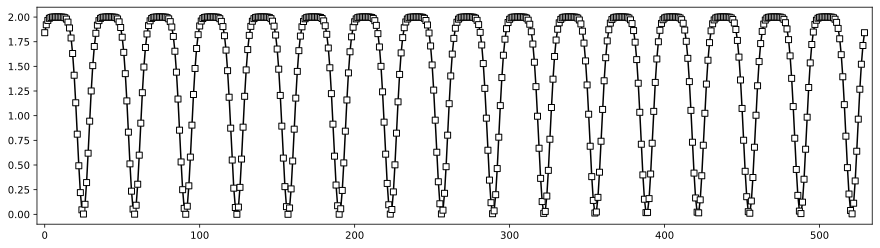

(400, 6, 6, 1)
(400,)


In [2]:
# import the data

No_train = 400
No_test = 130
N = No_train + No_test
seqlength = 36
x_size = 6
y_size = 6

time = np.linspace(0,32*np.pi,N)
data = np.add(np.sin(time+np.cos(time)),1)

plt.figure(figsize=(15,4))
plt.plot(data,'ks-',markerfacecolor='w')
plt.xlim([-5,N+4])
plt.show()

X_train = np.zeros((No_train,x_size,y_size,1))
y_train = np.zeros(No_train)

for timei in range(No_train):
  # grab a snippet of data
  X = data[timei:timei+seqlength]
  X_2D = X.reshape(1,x_size,y_size,1)
  X_train[timei,:,:,0] = X_2D[0,:,:,0]
  y = data[timei+seqlength]
  y_train[timei] = y

print(X_train.shape)
print(y_train.shape)

(94, 6, 6, 1)
(94,)


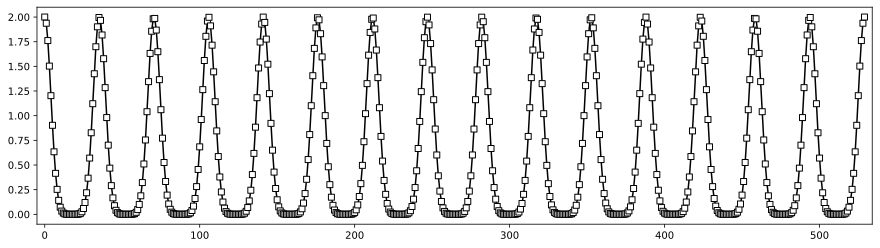

(494, 6, 6, 1)
(494,)


In [3]:
X_test = np.zeros((No_test-seqlength,x_size,y_size,1))
y_test = np.zeros(No_test-seqlength)

for timei in range(No_test-seqlength):
  # grab a snippet of data
  X = data[timei+No_train:timei+No_train+seqlength]
  X_2D = X.reshape(1,x_size,y_size,1)
  X_test[timei,:,:,0] = X_2D[0,:,:,0]
  y = data[timei+seqlength+No_train]
  y_test[timei] = y

print(X_test.shape)
print(y_test.shape)

time_valid = np.linspace(0,30*np.pi,N)
data_valid = np.add(np.cos(time_valid+np.sin(time_valid)),1)
#data_valid = np.multiply(np.add(np.sin(time_valid+np.cos(time_valid)),1), 1/0.024573)

plt.figure(figsize=(15,4))
plt.plot(data_valid,'ks-',markerfacecolor='w')
plt.xlim([-5,N+4])
plt.show()

X_valid = np.zeros((N-seqlength,x_size,y_size,1))
y_valid = np.zeros(N-seqlength)

for timei in range(N-seqlength):
  # grab a snippet of data
  X_v = data_valid[timei:timei+seqlength]
  X_v_2D = X_v.reshape(1,x_size,y_size,1)
  X_valid[timei,:,:,0] = X_v_2D[0,:,:,0]
  y_v = data_valid[timei+seqlength]
  y_valid[timei] = y_v

print(X_valid.shape)
print(y_valid.shape)

# Create a class for the DL model

In [7]:
#input_shape = (1,6,6,1)

model = keras.Sequential()
#model.add(layers.Dense(32, activation='relu',  input_shape=input_shape[1:]))
#model.add(layers.Conv2D(filters=4, kernel_size=1, activation='relu', input_shape=input_shape[1:]))
model.add(layers.Conv2D(filters=4, kernel_size=1, activation='relu', input_shape=(x_size,y_size,1)))
#model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))
opt = keras.optimizers.SGD(learning_rate=0.005)
model.compile(optimizer=opt, loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 6, 6, 4)           8         
                                                                 
 flatten_2 (Flatten)         (None, 144)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 580       
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1562
Epoch 2/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 4/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0016
Epoch 5/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0012
Epoch 6/50
400/400 [==============================] - 1s 1ms/step - loss: 9.5124e-04
Epoch 7/50
400/400 [==============================] - 1s 1ms/step - loss: 7.5314e-04
Epoch 8/50
400/400 [==============================] - 1s 1ms/step - loss: 6.4574e-04
Epoch 9/50
400/400 [==============================] - 1s 1ms/step - loss: 5.7701e-04
Epoch 10/50
400/400 [==============================] - 1s 1ms/step - loss: 5.2095e-04
Epoch 11/50
400/400 [==============================] - 1s 1ms/step - loss: 4.7463e-04
Epoch 12/50
400/400 [==============================] - 1s 1ms/step - loss: 4.4936e-

In [9]:
test_loss = model.evaluate(X_test, y_test)
print("Test loss: {}".format(test_loss))

3/3 [==============================] - 0s 4ms/step - loss: 2.3857e-04
Test loss: 0.00023856692132540047


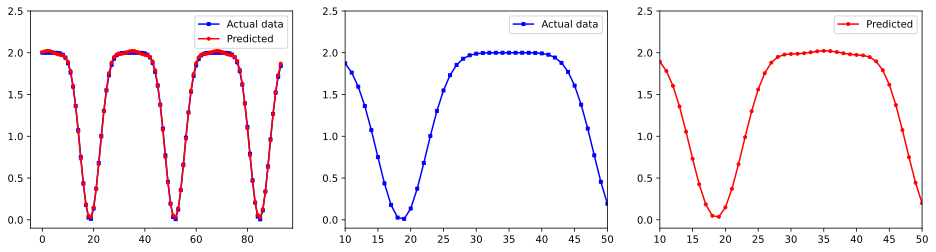

In [10]:
test_predictions = model.predict(X_test)
#print(test_predictions)
fig,ax = plt.subplots(1,3,figsize=(16,4))
ax[0].plot(y_test,'bs-',label='Actual data',markersize=3)
ax[0].plot(test_predictions,'ro-',label='Predicted',markersize=3)
ax[0].set_ylim([-0.1,2.5])
ax[0].legend()

ax[1].plot(y_test,'bs-',label='Actual data',markersize=3)
ax[1].set_xlim([10,50])
ax[1].set_ylim([-0.1,2.5])
ax[1].legend()

ax[2].plot(test_predictions,'ro-',label='Predicted',markersize=3)
ax[2].set_xlim([10,50])
ax[2].set_ylim([-0.1,2.5])
ax[2].legend()

In [11]:
MODELS_DIR = '/content/drive/MyDrive/tflite/TFLite_2D_CNN_wavePrediction/'
MODEL_TF = MODELS_DIR + 'model_CNN'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

model.save(MODEL_TF)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tflite/TFLite_2D_CNN_wavePrediction/model_CNN/assets


In [12]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

4428

In [26]:
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

#def representative_dataset():
#  for value in X_train: 
# Each scalar value must be inside of a 2D array that is wrapped in a list 
#    yield [np.array(value, dtype = np.float32, ndmin = 4)]

# Set the optimization flag.
# Enforce integer only quantization
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8
# converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
#converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

4560

In [27]:
# Instantiate an interpreter for each model 
sine_model = tf.lite.Interpreter(MODEL_NO_QUANT_TFLITE) 

# Allocate memory for each model 
sine_model.allocate_tensors() 

# Get indexes of the input and output tensors 
sine_model_input_index = sine_model.get_input_details()[0]["index"] 
sine_model_output_index = sine_model.get_output_details()[0]["index"]

print(sine_model_input_index)
print(sine_model_output_index)

0
11


In [28]:
x_test_ = X_valid.copy()
#print(np.size(X_valid,0))
x_test_ = x_test_.reshape((np.size(X_valid,0),6,6,1,1))
x_test_ = x_test_.astype(np.float32)
#print(x_test_)
# Instantiate an interpreter for each model 
sine_model_quantized = tf.lite.Interpreter(MODEL_TFLITE) 

# Allocate memory for each model 
sine_model_quantized.allocate_tensors() 

# Get indexes of the input and output tensors 
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]
input_scale, input_zero_point = sine_model_quantized_input_index["quantization"]
if (input_scale, input_zero_point) != (0.0, 0):
  x_test = x_test_ / input_scale + input_zero_point
  x_test_ = x_test_.astype(sine_model_quantized_input_index["dtype"])

# print([x_test_[0,:,:,0]])

# Invoke the interpreter
y_pred = np.empty(np.size(X_valid,0), dtype=sine_model_quantized_output_index["dtype"])
for i in range(np.size(X_valid,0)):
  sine_model_quantized.set_tensor(sine_model_quantized_input_index["index"], [x_test_[i,:,:,0]])
  sine_model_quantized.invoke()
  y_pred[i] = sine_model_quantized.get_tensor(sine_model_quantized_output_index["index"])[0]

output_scale, output_zero_point = sine_model_quantized_output_index["quantization"]
if (output_scale, output_zero_point) != (0.0, 0):
  y_pred = y_pred.astype(np.float32)
  y_pred = (y_pred - output_zero_point) * output_scale

print(y_pred)

#print(sine_model_input_index)
#print(sine_model_output_index)
#print(sine_model_quantized_input_index)
#print(sine_model_quantized_output_index)

[ 1.63433933e+00  1.39661825e+00  1.12515700e+00  8.48212600e-01
  5.91815948e-01  3.75588000e-01  2.11645022e-01  1.02120481e-01
  4.10744958e-02  1.91674065e-02 -1.09815772e-03 -1.25225887e-01
 -2.08437383e-01 -2.53147453e-01 -2.58515656e-01 -2.25382149e-01
 -1.64724216e-01 -8.53518024e-02  9.74819809e-03  3.57618779e-02
  4.67480086e-02  5.94485737e-02  8.14018920e-02  1.25741735e-01
  2.07848370e-01  3.40706080e-01  5.30067801e-01  7.70442128e-01
  1.04446769e+00  1.32484972e+00  1.57943916e+00  1.77716804e+00
  1.89456463e+00  1.91795814e+00  1.84597647e+00  1.68853188e+00
  1.46447527e+00  1.19920123e+00  9.21041667e-01  6.56907022e-01
  4.28495467e-01  2.49932483e-01  1.26225770e-01  5.32963015e-02
  2.03098245e-02  1.91674065e-02 -9.53498408e-02 -1.89911693e-01
 -2.44936511e-01 -2.61638731e-01 -2.37230867e-01 -1.83103397e-01
 -1.07837476e-01 -1.70745291e-02  3.28951813e-02  4.37661000e-02
  5.55991158e-02  7.40004033e-02  1.10843606e-01  1.81400076e-01
  2.99794614e-01  4.74132

In [29]:
# Create arrays to store the results 
sine_model_predictions = [] 

# Run each model's interpreter for each value and store the results in arrays 
for x_value in X_valid:
  #print(x_value)
  # Create a 2D tensor wrapping the current x value 
  x_value_tensor = tf.convert_to_tensor([x_value], dtype=np.float32)
  # Write the value to the input tensor 
  sine_model.set_tensor(sine_model_input_index, x_value_tensor) 
  # Run inference 
  sine_model.invoke()
  # Read the prediction from the output tensor 
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0]) 
  # Do the same for the quantized model

In [ ]:
"""
# Create arrays to store the results 
sine_model_predictions = [] 
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays 
for x_value in X_valid:
  #print(x_value)
  # Create a 2D tensor wrapping the current x value 
  x_value_tensor = tf.convert_to_tensor([x_value], dtype=np.float32)
  # Write the value to the input tensor 
  sine_model.set_tensor(sine_model_input_index, x_value_tensor) 
  # Run inference 
  sine_model.invoke()
  # Read the prediction from the output tensor 
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0]) 
  # Do the same for the quantized model

  #tf.cast(x, tf.int32)
  #sine_model_quantized.set_tensor(sine_model_quantized_input_index, tf.cast(x_value_tensor*128, tf.int8)) 
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor) 
  sine_model_quantized.invoke() 
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])
"""

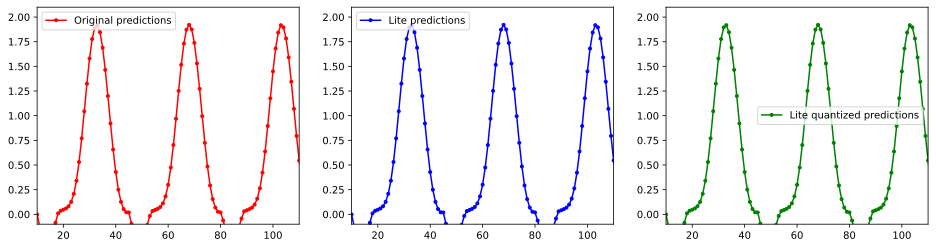

In [30]:
valid_predictions = model.predict(X_valid)

fig,ax = plt.subplots(1,3,figsize=(16,4))
ax[0].plot(valid_predictions,'ro-',label='Original predictions',markersize=3)
ax[0].set_xlim([10,110])
#ax[0].set_ylim([-0.1,90])
ax[0].set_ylim([-0.1,2.1])
ax[0].legend()

ax[1].plot(sine_model_predictions,'bo-',label='Lite predictions',markersize=3)
ax[1].set_xlim([10,110])
#ax[1].set_ylim([-0.1,90])
ax[1].set_ylim([-0.1,2.1])
ax[1].legend()

#ax[2].plot(np.multiply(sine_model_quantized_predictions,1/128),'go-',label='Lite quantized predictions',markersize=3)
ax[2].plot(y_pred,'go-',label='Lite quantized predictions',markersize=3)
ax[2].set_xlim([10,110])
#ax[2].set_ylim([-0.1,90])
ax[2].set_ylim([-0.1,2.1])
ax[2].legend()

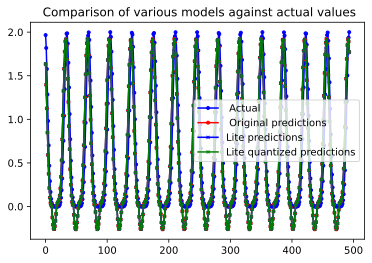

In [31]:
# See how they line up with the data 
plt.clf() 
plt.title(' Comparison of various models against actual values') 
plt.plot( y_valid, 'bo-', label =' Actual',markersize=3) 
plt.plot( valid_predictions, 'ro-', label =' Original predictions',markersize=3) 
plt.plot( sine_model_predictions, 'bx-', label ='Lite predictions',markersize=3) 
plt.plot( y_pred, 'gx-', label ='Lite quantized predictions',markersize=3) 
plt.legend() 
plt.show()

In [32]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graph

In [33]:
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
# Update variable names
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

In [34]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}

unsigned char g_model[] = {
  0x24, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00,
  0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x50, 0x11, 0x00, 0x00,
  0x58, 0x0b, 0x00, 0x00, 0x40, 0x0b, 0x00, 0x00, 0xb0, 0x00, 0x00, 0x00,
  0x78, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xde, 0xf3, 0xff, 0xff, 0x40, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00,
  0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61,
  0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xbc, 0xff, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00,
  0x07, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x35, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x5a, 0xf5, 0xff, 0xff,
  0x04, 0x